In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


In [8]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [20]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

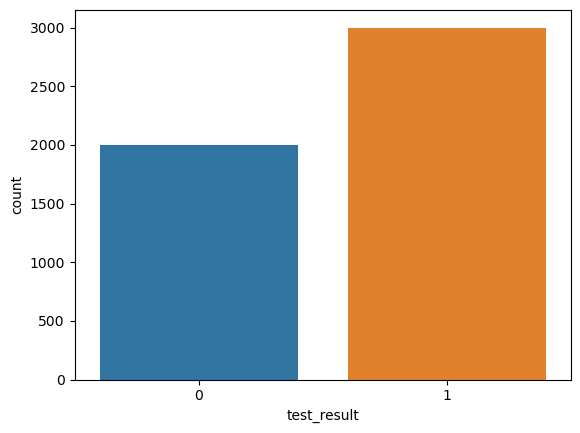

In [21]:
sns.countplot(x='test_result',data=df)
plt.show()

# we can see that there are more no of patients who are having hearing related problems 

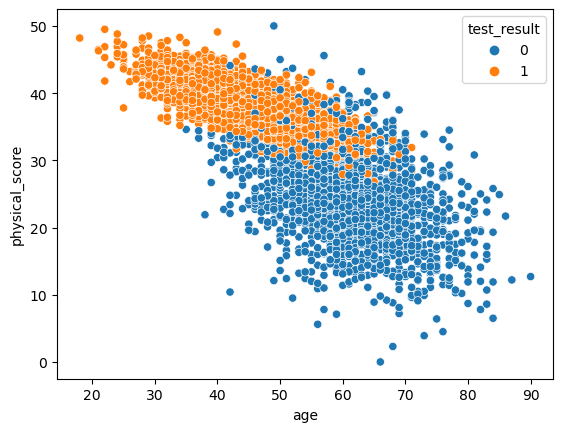

In [6]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')
plt.show()

# we cansee from the scatter plot is that those patients who have less physical score have the hearing prob and also the patients having age more than 45 are tends to have hearig prob

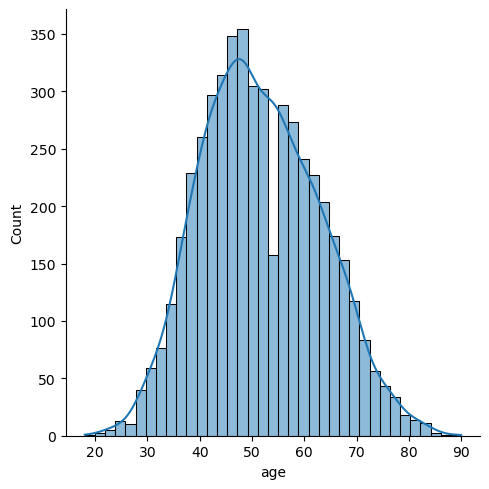

age               0.220942
physical_score   -0.779282
test_result      -0.408371
dtype: float64

In [18]:
sns.displot(x='age',data=df,kde=True)
plt.show()
df.skew()

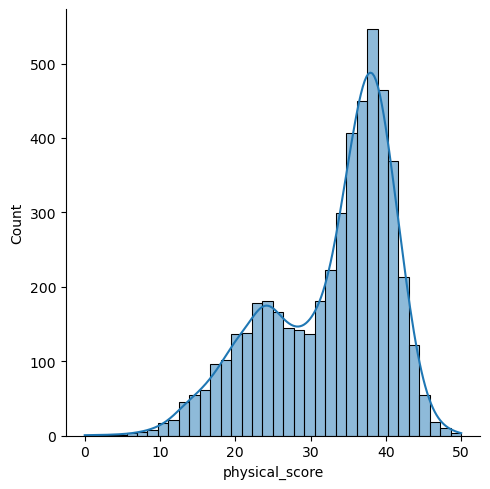

In [19]:
sns.displot(x='physical_score',data=df,kde=True)
plt.show()

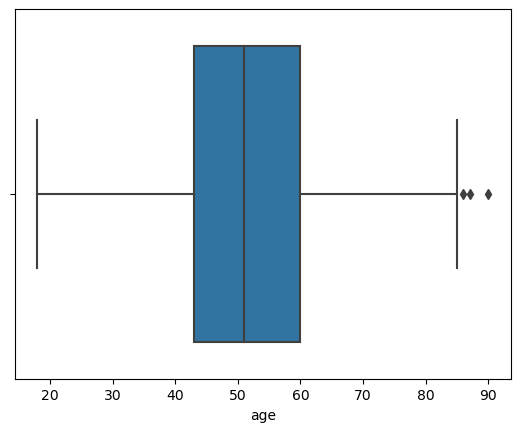

In [22]:
sns.boxplot(x='age',data=df)
plt.show()

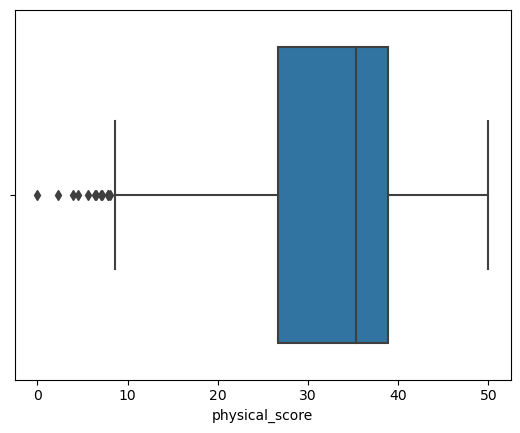

In [23]:
sns.boxplot(x='physical_score',data=df)
plt.show()

In [24]:
#Removing the Outliers:
from feature_engine.outliers import Winsorizer

In [25]:
Win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['age'])
df['age']=Win.fit_transform(df[['age']])

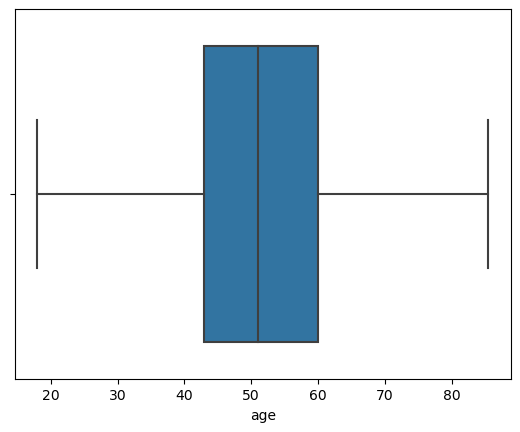

In [26]:
sns.boxplot(x='age',data=df)
plt.show()

In [27]:
Win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['physical_score'])
df['physical_score']=Win.fit_transform(df[['physical_score']])

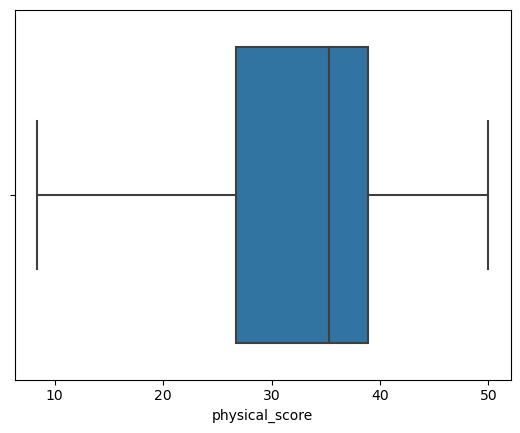

In [28]:
sns.boxplot(x='physical_score',data=df)
plt.show()

# train_test split

In [29]:
x=df.drop('test_result',axis=1)
y=df['test_result']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3500, 2), (1500, 2), (3500,), (1500,))

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
# prediction
y_test_pred=Lr.predict(x_test)
y_train_pred=Lr.predict(x_train)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_train,y_train_pred)

0.9191428571428572

In [37]:
accuracy_score(y_test,y_test_pred)

0.9053333333333333

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


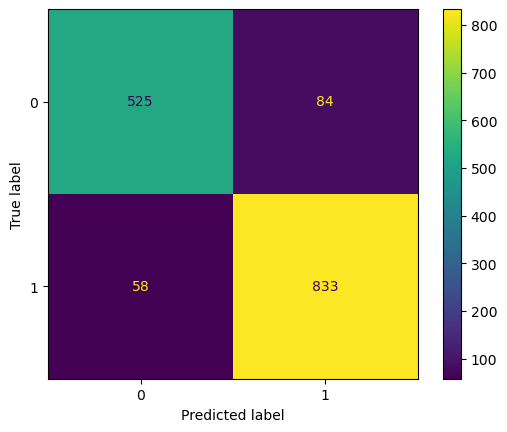

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Lr,x_test,y_test)

In [39]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Lr,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

[0.933 0.915 0.908 0.91  0.914]
The mean Cross-Validation score is: 0.916


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       609
           1       0.91      0.93      0.92       891

    accuracy                           0.91      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.91      0.91      0.90      1500



C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


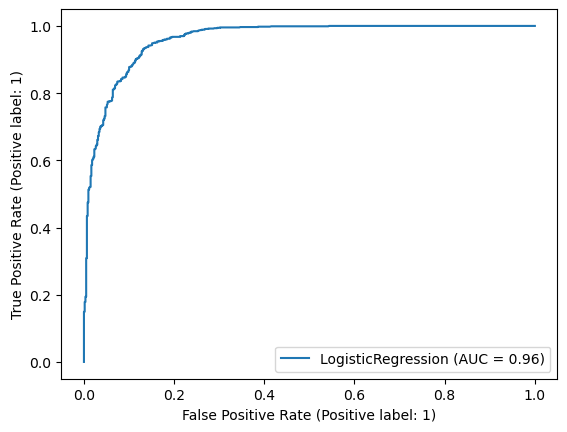

In [41]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Lr,x_test,y_test)

# practice example of the LOGISTIC REGRESSION


In [20]:
df=pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Age: the max age of the passenger is :76, 
# passenger on board were 418
# mean age :30
# max fare that was taken was: 512.32

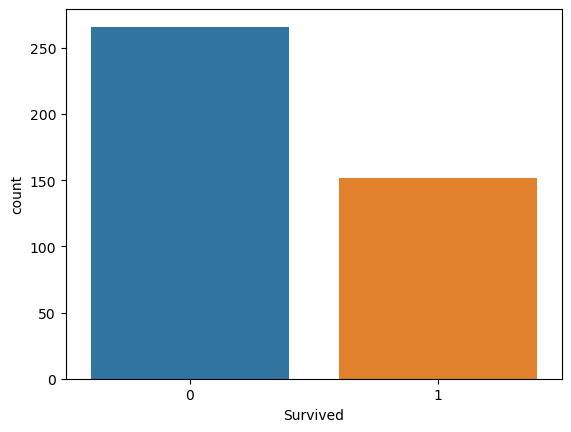

In [5]:
sns.countplot(x='Survived',data=df)
plt.show()

# as we can see that the count of the death is more than survived passenger


In [6]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

# class 3 pasengers were more than the class 2 and 1

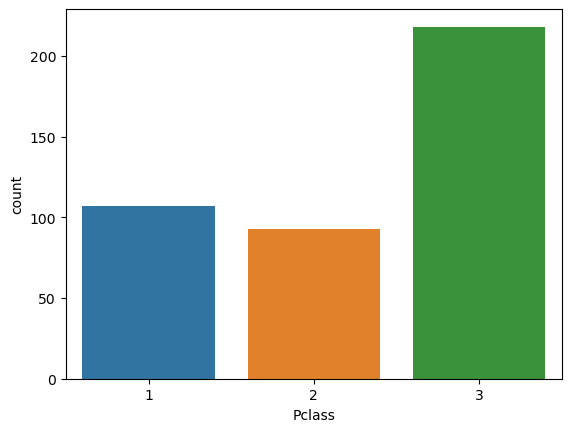

In [7]:
sns.countplot(x='Pclass',data=df)
plt.show()

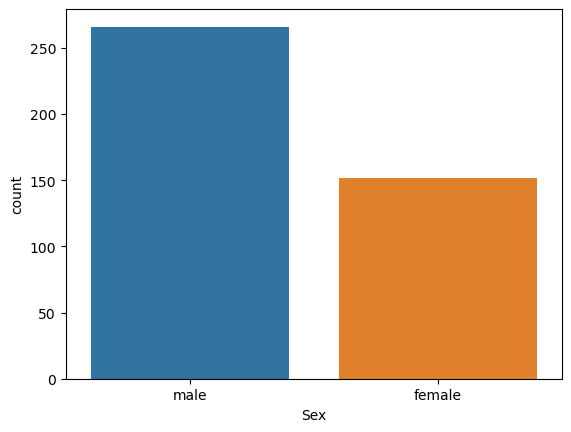

In [8]:
sns.countplot(x='Sex',data=df)
plt.show()

In [9]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

# there are more no of male present on the ship 

In [10]:
marr=df['Name']
a=[]
for i in marr:
    j=i.split()
    a.append(j[1])    

['Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Mrs.', 'Carlo,', 'Mr.', 'Mr.', 'Miss.', 'Khalil,', 'Mr.', 'Master.', 'Mrs.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Mr.', 'Master.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Master.', 'Mrs.', 'Miss.', 'Mr.', 'Mr.', 'Mrs.', 'Miss.', 'Mr.', 'Miss.', 'y', 'Miss.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Master.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Ms.', 'Master.', 'Mrs.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Palmquist,', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mrs.', 'Miss.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.',

In [12]:
df_M=pd.DataFrame(a)
df_M.value_counts()

Mr.             234
Miss.            77
Mrs.             70
Master.          19
y                 4
Billiard,         2
Col.              2
Rev.              2
Brito,            1
Carlo,            1
Dr.               1
Khalil,           1
Messemaeker,      1
Ms.               1
Palmquist,        1
Planke,           1
dtype: int64

In [15]:
# we can see from here that there are 77 woment who where un-married ,70 of them where married ,
#there where 234 mens present on the ship,

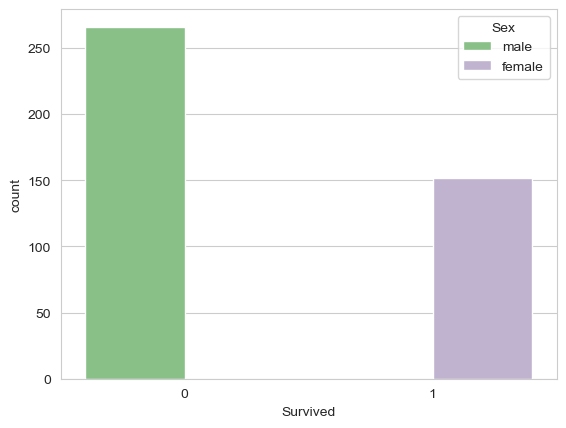

In [18]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Sex',palette = 'Accent',data = df)
plt.show()
#showing how many men and women survived 
#as we can see that more than 400 male died,and more than 200 men survived during the titanic crash
#as we can see from the data more than 200 female were survived and less than or equal to 100 me survived

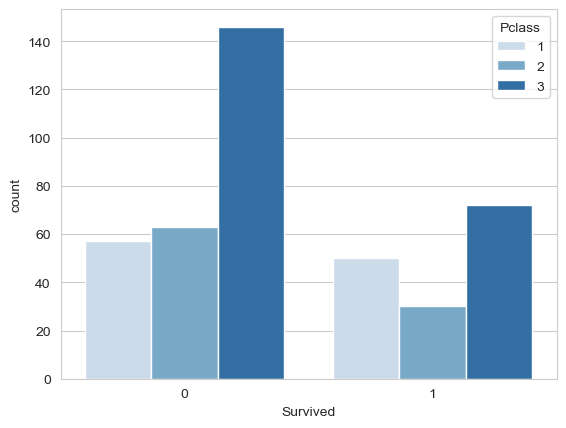

In [17]:
sns.countplot(x = 'Survived',hue = 'Pclass',data = df,palette = 'Blues')
plt.show()
#as we can see passenger who had class-3 tickets has more number of deaths
#and passenger who were having class-1 tickets they were saved in more numbers

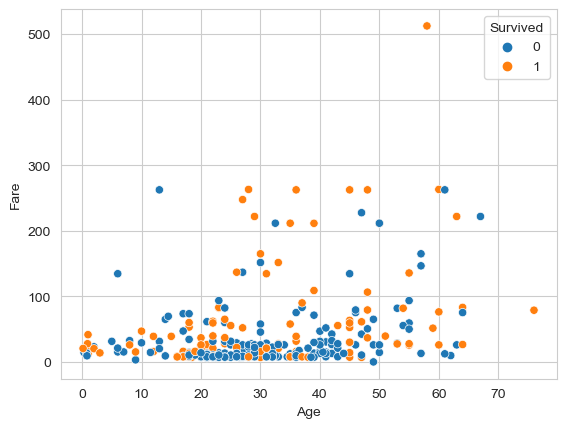

In [21]:
sns.scatterplot(x = 'Age',y = 'Fare',hue = 'Survived',data = df)
plt.show()
#as we can see that the people who paid more those were the people were survived
#and the people who paid less were dead 

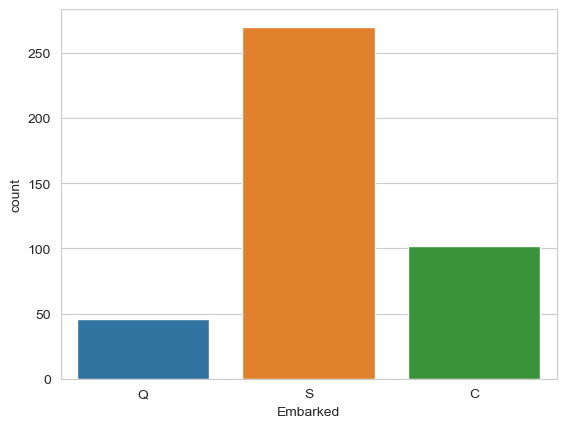

In [34]:
sns.countplot(x='Embarked',data=df)
plt.show()
#Embarked: implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, 
#and Queenstown. More than 70% of the people boarded from Southampton.

In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# treating the missing values

In [47]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

# searching for any outliers

In [29]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Age'])
df['Age']=win.fit_transform(df[['Age']])


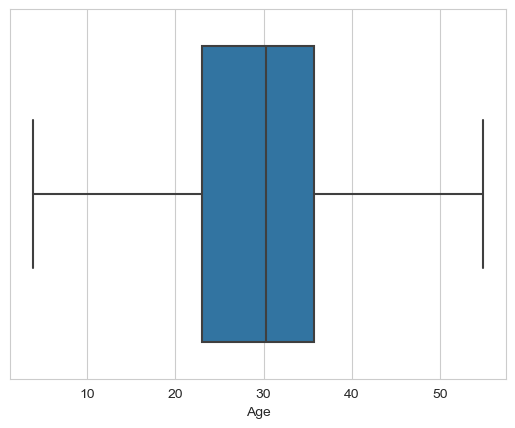

In [30]:
sns.boxplot(x='Age',data=df)
plt.show()

In [40]:
df.drop(columns=['PassengerId','Cabin','Name','Ticket'],inplace=True)

KeyError: "['PassengerId', 'Cabin', 'Name', 'Ticket'] not found in axis"

In [ ]:
# parch: The dataset defines family relations in this way... 
# Some children travelled only with a nanny, therefore parch=0 for them.

#Embarked: implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, 
#and Queenstown. More than 70% of the people boarded from Southampton.

In [41]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,54.87500,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


In [42]:
df=pd.get_dummies(df,drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.50000,0,0,7.8292,1,1,0
1,1,3,47.00000,1,0,7.0000,0,0,1
2,0,2,54.87500,0,0,9.6875,1,1,0
3,0,3,27.00000,0,0,8.6625,1,0,1
4,1,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,30.27259,0,0,8.0500,1,0,1
414,1,1,39.00000,0,0,108.9000,0,0,0
415,0,3,38.50000,0,0,7.2500,1,0,1
416,0,3,30.27259,0,0,8.0500,1,0,1


In [48]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [49]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((292, 8), (126, 8), (292,), (126,))

In [51]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# prediction

In [52]:
y_test_pred=Lr.predict(x_test)
y_train_pred=Lr.predict(x_train)

# Evaluation

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_train,y_train_pred)

1.0

In [55]:
accuracy_score(y_test,y_test_pred)

1.0

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


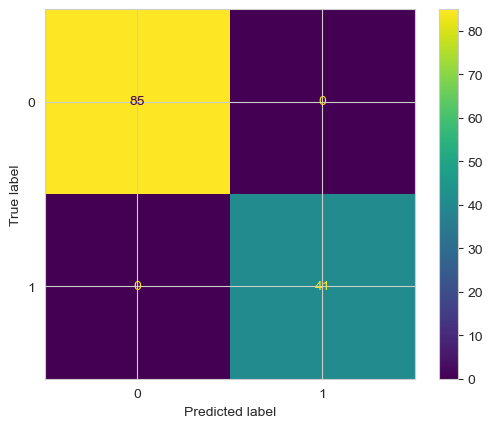

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Lr,x_test,y_test)

In [57]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Lr,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

[1. 1. 1. 1. 1.]
The mean Cross-Validation score is: 1.0


C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


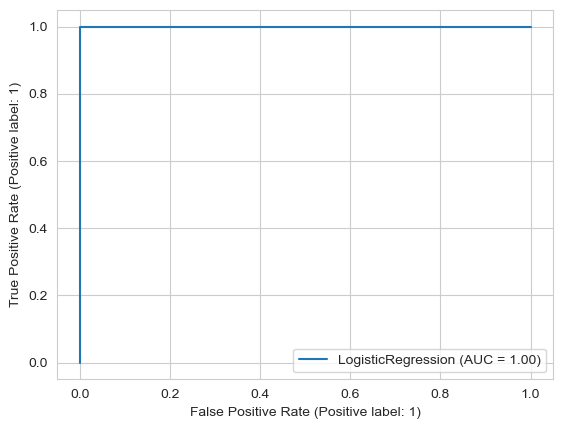

In [59]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Lr,x_test,y_test)